In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_data_path = '/content/drive/MyDrive/train-data/train'
val_data_path = '/content/drive/MyDrive/val-data/val'

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path,batch_size=32,class_mode='binary',target_size=(150,150))

Found 1983 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(val_data_path,batch_size=32,class_mode='binary',target_size=(150,150))

Found 324 images belonging to 4 classes.


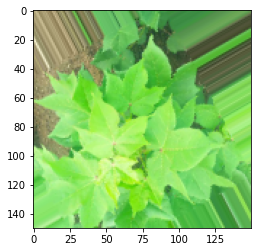

In [ ]:
plt.imshow(training_data[0][0][1])

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
                                 keras.layers.MaxPool2D(pool_size=(2,2)),
                                 keras.layers.Conv2D(filters=64,kernel_size=3),
                                 keras.layers.MaxPool2D(pool_size=(2,2)),
                                 keras.layers.Conv2D(128,kernel_size=3),
                                 keras.layers.MaxPool2D(pool_size=(2,2)),
                                 keras.layers.Conv2D(256,kernel_size=3),
                                 keras.layers.MaxPool2D(pool_size=(2,2)),

                                 keras.layers.Dropout(0.5),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128,activation='relu'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Dense(256,activation='relu'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Dense(4,activation='softmax')



])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy , metrics=['accuracy'])

In [ ]:
res =  model.fit(training_data,
                 epochs=10)

Epoch 1/10
62/62 [==============================] - 475s 8s/step - loss: 1.1926 - accuracy: 0.4897
Epoch 2/10
62/62 [==============================] - 123s 2s/step - loss: 0.9882 - accuracy: 0.6021
Epoch 3/10
62/62 [==============================] - 121s 2s/step - loss: 0.8898 - accuracy: 0.6394
Epoch 4/10
62/62 [==============================] - 120s 2s/step - loss: 0.8810 - accuracy: 0.6495
Epoch 5/10
62/62 [==============================] - 117s 2s/step - loss: 0.8043 - accuracy: 0.6757
Epoch 6/10
62/62 [==============================] - 118s 2s/step - loss: 0.7732 - accuracy: 0.6828
Epoch 7/10
62/62 [==============================] - 118s 2s/step - loss: 0.6562 - accuracy: 0.7554
Epoch 8/10
62/62 [==============================] - 117s 2s/step - loss: 0.6660 - accuracy: 0.7352
Epoch 9/10
62/62 [==============================] - 118s 2s/step - loss: 0.6202 - accuracy: 0.7665
Epoch 10/10
62/62 [==============================] - 119s 2s/step - loss: 0.5500 - accuracy: 0.7922


In [ ]:
import pickle

In [ ]:
with open('parrot.pkl', 'wb') as f:
   pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://0cc58659-12a7-4dc3-aa1a-dc6ee9947bc0/assets


In [ ]:
model.save('model.h5')

In [ ]:
with open('parrot.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array


In [ ]:
test_img = load_img('/content/drive/MyDrive/val-data/val/diseased cotton plant/dd (10)_iaip.jpg',target_size=(150,150))

In [ ]:
test_img = img_to_array(test_img)/255

In [ ]:
import numpy as np
test_img = np.expand_dims(test_img,axis=0)

In [ ]:
test_img.shape

In [ ]:
result = model.predict(test_img)

In [ ]:
result